<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement



Better student performance is traditionally associated lower Teacher-Student ratios and experienced teachers. 


As a member of the California State Education Department deliberating whether mandate smaller class sizes or hire more experienced teachers. This project aims conduct a preliminary study to verify this hypothesis in California using data from the 2019 SAT & ACT from K12 test-takers to see if this relationship exists by comparing the


    - Teacher-Student Ratio 
    - Teacher's Teaching Experience (Average years of teaching experience and average years of teaching in the county)

of counties with students scoring above the SAT benchmark and ACT score of 21 in 2019 (hereby referred to as the measured outcomes)


To answer the question:
> "Do lower Teacher-K12 Student Ratios or greater teacher experience affect the measured outcomes for the SAT and ACT?"




### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, more information can be found at the websites below:
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Class size is one of the small number of variables in American K-12 education that are both thought to influence student learning legislative mandates on maximum class size have been very popular at the state level.  In recent decades, at least 24 states have mandated or incentivized class-size reduction (CSR). As small classes would be higher to maintain due to manpower costs (more teachers required) and infrastructure (more classrooms and separate facilities), a deeper study on whether CSR does indeed provide better student outcomes is required.

Teacher experience is used as an alternative to compare the effects of Teacher-Student Ratio on the measured SAT and ACT outcomes.

### Data Used in This Notebook

We will be using the following datasets in this notebook, brief description of the datasets below:

- State of California 2019 SAT Data `(sat_2019_ca.csv)`: Shows the 2019 SAT outcomes at school, district and county-level by grade 11 & 12 students
    
- State of California 2019 ACT Data `(act_2019_ca.csv)`: Shows the 2019 ACT outcomes at school, district and county-level by grade 12 students only

### Outside Research

External data separate from the SAT and ACT scores were obtained from the California Department of Education. The external data are:

- 2018-2019 Certificated Staff Education Report: State of California Teachers `(StaffEducation.txt)`: Shows the number of teachers per county by education level for counties in California in 2018-2019


- 2018-2019 Certificated Staff Experience Report: State of California Teachers `(StaffExp.txt)`: Shows the average teacher years in service and teaching years in the county for counties in California in 2018-2019

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def get_mean(val):
    return (sum(val)/len(val))

In [2]:
# Testing the function 1
get_mean([1,2,3,4])

2.5

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
def get_std(val):
    total = 0
    for i in val:
        total += (i-get_mean(val))**2
    
    return (total/len(val))**(1/2)

In [4]:
# We import numpy to check use the .std() method
import numpy as np

print(get_std([1,2,3,4]))
print(np.std([1,2,3,4]))

1.118033988749895
1.118033988749895


3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [5]:
def percent_str_to_float(string):
    return float(string.replace("%",""))/100

In [6]:
# Testing the function using "50%" and "30.55%"
print(percent_str_to_float("50%"))
print(percent_str_to_float("30.55%"))

0.5
0.3055


--- 
# Data Import and Cleaning

---

*All libraries used should be added here*

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Approach
We will be adopting the approach below:


-  Import and clean the California 2019 SAT dataset, California 2019 ACT dataset, California Teachers Qualifications dataset and California Teacher's Experience dataset
-  Create additional columns for the additional metrics required for each DataFrame
-  Merge the required columns to form the consolidated SAT and ACT DataFrame for analysis after individual DataFrames are cleaned.

###  DATASET 1 : California 2019 SAT Outcomes `(sat_2019_ca.csv)`

In [8]:
# Display the data: print the first 5 rows of each dataframe to your Jupyter notebook

sat_ca = pd.read_csv("../data/sat_2019_ca.csv")
display(sat_ca.shape)
display(sat_ca.head())

(2580, 26)

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


In [9]:
# Filter down to county-level & verify 58 counties are included
sat_ca_county = sat_ca[sat_ca["RType"]=="C"]
display(sat_ca_county.shape)
display(sat_ca_county.head())

(58, 26)

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
1981,9.000000e+12,9.0,900000.0,0.0,C,NaN,NaN,El Dorado,2226.0,604.0,...,667,93.55,636,89.20,442,73.18,619,86.82,2018-19,NaN
1982,1.900000e+13,19.0,1900000.0,0.0,C,NaN,NaN,Los Angeles,114618.0,48676.0,...,39363,57.65,26064,38.18,18555,38.12,24602,36.03,2018-19,NaN
1983,2.000000e+13,20.0,2000000.0,0.0,C,NaN,NaN,Madera,2352.0,442.0,...,608,47.13,316,24.50,127,28.73,293,22.71,2018-19,NaN
1984,5.700000e+13,57.0,5700000.0,0.0,C,NaN,NaN,Yolo,2299.0,759.0,...,709,88.85,605,75.81,443,58.37,591,74.06,2018-19,NaN
1985,1.500000e+13,15.0,1500000.0,0.0,C,NaN,NaN,Kern,14229.0,3793.0,...,2077,74.47,1570,56.29,1364,35.96,1454,52.13,2018-19,NaN


In [10]:
# Create a new dataframe with columns that we require
sat_ca_county_processed = sat_ca_county[["CName", "Enroll12", "NumTSTTakr12", "TotNumBothBenchmark12","PctBothBenchmark12"]]

# Checking for null values
display(sat_ca_county_processed.isnull().sum()) # Show columns with null values
display(sat_ca_county_processed[sat_ca_county_processed.isnull().any(axis=1)]) # Show rows with the above null values

CName                    0
Enroll12                 0
NumTSTTakr12             0
TotNumBothBenchmark12    1
PctBothBenchmark12       1
dtype: int64

,CName,Enroll12,NumTSTTakr12,TotNumBothBenchmark12,PctBothBenchmark12
2012,Alpine,0.0,0.0,NaN,NaN


There is only a single row which contains **ALL** the null values. We will drop data from Alpine county.<br><br>



In [11]:
sat_ca_county_processed.drop(2012,inplace=True) # Drop the row with the missing value

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
# convert numerical values to float and check for string characters in data
numerical_cols_sat = list(sat_ca_county_processed.columns)[1:]

try:
    sat_ca_county_processed = sat_ca_county_processed[numerical_cols_sat].astype(float)
except ValueError as e:
    print(e) # Need to remove "*" from the columns


could not convert string to float: '*'


In [13]:
# Removing str characters and converting to desired datatype
sat_ca_county_processed = sat_ca_county_processed.replace("*",np.nan) # Display rows with string characters 
display(sat_ca_county_processed[sat_ca_county_processed.isnull().any(axis=1)]) # 2 rows contain "*"


sat_ca_county_processed.dropna(axis=0,inplace=True) # Drop the above rows away, converting numerical values to float 
sat_ca_county_processed[numerical_cols_sat] = sat_ca_county_processed[numerical_cols_sat].astype(float) # Datatype conversion

,CName,Enroll12,NumTSTTakr12,TotNumBothBenchmark12,PctBothBenchmark12
1988,Sierra,23.0,5.0,NaN,NaN
2018,Trinity,154.0,13.0,NaN,NaN


In [14]:
# Creating new columns to derive metrics we require
sat_ca_county_processed["participation_rate"] = round(100*((sat_ca_county_processed["NumTSTTakr12"])/ sat_ca_county_processed["Enroll12"]),3)
sat_ca_county_processed["pct_met_bm"] = round(100* ((sat_ca_county_processed["TotNumBothBenchmark12"])/ sat_ca_county_processed["Enroll12"]),3)

# Drop columns we do not need and reset index
sat_ca_county_processed.drop(columns=["TotNumBothBenchmark12", "PctBothBenchmark12"], inplace=True)
sat_ca_county_processed.reset_index(drop=True, inplace=True)

# Renaming the columns and reset index
sat_ca_county_processed.rename(columns = {'CName':'county', 'Enroll12':'k12_enrollment', 'NumTSTTakr12':'k12_test_takers'}, inplace=True)
sat_ca_county_processed.sort_values("county", inplace=True)
sat_ca_county_processed.reset_index(drop=True, inplace=True)
display(sat_ca_county_processed.shape)
display(sat_ca_county_processed.head())
display(sat_ca_county_processed.dtypes)

(55, 5)

,county,k12_enrollment,k12_test_takers,participation_rate,pct_met_bm
0,Alameda,17567.0,5946.0,33.848,19.685
1,Amador,305.0,53.0,17.377,10.820
2,Butte,2551.0,551.0,21.599,13.015
3,Calaveras,451.0,90.0,19.956,13.304
4,Colusa,339.0,74.0,21.829,4.130


county                 object
k12_enrollment        float64
k12_test_takers       float64
participation_rate    float64
pct_met_bm            float64
dtype: object

### DATASET 2: California 2019 ACT Outcomes `(act_2019_ca.csv)`

Since we are only interested in County-level data, we will:


1. Create a new dataframe which only contains the columns required.


      CName : County Name 
      Enroll12 : K12 Enrollment for the County 
      NumTSTTakr12 : Number of K12 Test-Takers 
      NumGE21 : Number of K12 Test-Takers Scoring 21 Marks and Above
      PctGE21 : Percentage of K12 Test-Takers Scoring 21 Marks and Above



2. Check for null and incorrect values in the DataFrame


3. Rename columns and reset index.


In [15]:
# Display the data: print the first 5 rows of each dataframe to your Jupyter notebook
act_ca = pd.read_csv("../data/act_2019_ca.csv")
act_ca.head()

# Filter down to county-level & verify 58 counties are included
act_ca_county = act_ca[act_ca["RType"]=="C"]
print(act_ca_county.shape)

(58, 18)


In [16]:
# Create a new DataFrame with required columns 
act_ca_county_processed = act_ca_county[["CName", "Enroll12", "NumTstTakr","PctGE21"]]

In [17]:
# Check for missing values and incorrect values
display(act_ca_county_processed.isnull().sum()) # Show columns with null values
display(act_ca_county_processed[act_ca_county_processed.isnull().any(axis=1)]) # Show rows which contain above null values
act_ca_county_processed.drop(1103, inplace=True) # Drop row that contained the null values

numerical_cols_act = list(act_ca_county_processed)[1:]
try: # Check for other string characters
    act_ca_county_processed = act_ca_county_processed[numerical_cols_act].astype(float)
except ValueError as e:
    print(e) # Need to remove "*" from the columns

CName         0
Enroll12      0
NumTstTakr    0
PctGE21       1
dtype: int64

,CName,Enroll12,NumTstTakr,PctGE21
1103,Alpine,0.0,0.0,NaN


could not convert string to float: '*'


C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
# Convert the string character to null so we can remove it
act_ca_county_processed = act_ca_county_processed.replace("*",np.nan)
display(act_ca_county_processed[act_ca_county_processed.isnull().any(axis=1)]) # Show rows that contain the above null values
act_ca_county_processed.dropna(axis=0,inplace=True) # Dropping the rows

# Convert numerical values into float, renaming the columns and reset index
act_ca_county_processed[numerical_cols_act] = act_ca_county_processed[numerical_cols_act].astype(float)
act_ca_county_processed["participation_rate"] = round(100*(act_ca_county_processed["NumTstTakr"]/act_ca_county_processed["Enroll12"]),3)
act_ca_county_processed.rename(columns = {"CName":"county", "Enroll12":"k12_enrollment", "NumTstTakr":"k12_test_takers",
                                          "NumGE21":"number_>=21", "PctGE21":"pct_>=21"}, inplace=True)
act_ca_county_processed.sort_values("county", inplace=True)
act_ca_county_processed.reset_index(drop=True, inplace=True)
display(act_ca_county_processed.shape)
display(act_ca_county_processed.dtypes)
display(act_ca_county_processed.head())

,CName,Enroll12,NumTstTakr,PctGE21
1076,Sierra,23.0,3.0,NaN
1100,Plumas,163.0,9.0,NaN
1105,Del Norte,363.0,5.0,NaN


(54, 5)

county                 object
k12_enrollment        float64
k12_test_takers       float64
pct_>=21              float64
participation_rate    float64
dtype: object

,county,k12_enrollment,k12_test_takers,pct_>=21,participation_rate
0,Alameda,17567.0,3630.0,67.74,20.664
1,Amador,305.0,37.0,78.38,12.131
2,Butte,2551.0,226.0,64.60,8.859
3,Calaveras,451.0,31.0,87.10,6.874
4,Colusa,339.0,26.0,34.62,7.670


### DATASET 3: California Teacher Qualifications `(StaffEducation.txt)`

In [19]:
# Display the data: print the first 5 rows of each dataframe to your Jupyter notebook
teacher_ed = pd.read_csv("../data/StaffEducation.txt", delimiter="\t")
display(teacher_ed.shape)
display(teacher_ed.head())
display(teacher_ed.dtypes)

(59, 14)

,Name,Code,Doctorate,Special Degree(Juris Doctor),Master's Degree +30,Master's Degree,Fifth Year within BA,Fifth Year Induction,Fifth Year,Baccalaureate Degree +30,Baccalaureate Degree,Associate Degree,None Reported,Total
0,Alameda,1,143,5,874,"3,303",3,2,7,"2,241","5,455",106,181,"12,320"
1,Alpine,2,0,0,0,2,0,0,0,8,1,0,0,11
2,Amador,3,6,0,19,66,0,0,0,170,33,0,0,294
3,Butte,4,4,0,99,224,1,0,4,"1,168",204,2,1,"1,707"
4,Calaveras,5,1,0,34,33,0,0,0,162,67,1,2,300


Name                            object
Code                             int64
Doctorate                       object
Special Degree(Juris Doctor)     int64
Master's Degree +30             object
Master's Degree                 object
Fifth Year within BA             int64
Fifth Year Induction             int64
Fifth Year                       int64
Baccalaureate Degree +30        object
Baccalaureate Degree            object
Associate Degree                 int64
None Reported                   object
Total                           object
dtype: object

In [20]:
# Check for missing values and incorrect values
display(teacher_ed.isnull().sum()) 

numerical_cols_teacher_ed = list(teacher_ed.columns)
numerical_cols_teacher_ed.remove("Name")
teacher_ed = teacher_ed.astype(str)

try: # Check for other string characters
    teacher_ed = teacher_ed[numerical_cols_teacher_ed].astype(int)
except ValueError as e:
    print(e) 
    
# We need to remove "," from the numerical values and converting to int
teacher_ed[numerical_cols_teacher_ed] = teacher_ed[numerical_cols_teacher_ed].apply(lambda x: x.str.replace(",",""))
teacher_ed[numerical_cols_teacher_ed] = teacher_ed[numerical_cols_teacher_ed].astype(int)
display(teacher_ed.dtypes)

Name                            0
Code                            0
Doctorate                       0
Special Degree(Juris Doctor)    0
Master's Degree +30             0
Master's Degree                 0
Fifth Year within BA            0
Fifth Year Induction            0
Fifth Year                      0
Baccalaureate Degree +30        0
Baccalaureate Degree            0
Associate Degree                0
None Reported                   0
Total                           0
dtype: int64

invalid literal for int() with base 10: '1,034'


Name                            object
Code                             int32
Doctorate                        int32
Special Degree(Juris Doctor)     int32
Master's Degree +30              int32
Master's Degree                  int32
Fifth Year within BA             int32
Fifth Year Induction             int32
Fifth Year                       int32
Baccalaureate Degree +30         int32
Baccalaureate Degree             int32
Associate Degree                 int32
None Reported                    int32
Total                            int32
dtype: object

In [21]:
# Verify row-sum with row-total
numerical_cols_teacher_ed.remove("Code") # Re-use the list from earlier to filter the dataframe
numerical_cols_teacher_ed.remove("Total")
print((teacher_ed[numerical_cols_teacher_ed].sum(axis=1) == teacher_ed["Total"]).sum()) # We expect to get 59 if all are true as there are 59 rows

59


The row-sums are verified with the row-total to be correct. 

To obtain a DataFrame with the total population of teachers in each county:

In [22]:
# Create a new dataframe with columns we require and verify datatypes
tot_teacher = teacher_ed[["Name","Total"]]
tot_teacher = tot_teacher.rename(columns={"Name":"county", "Total":"teachers_total"})
display(tot_teacher.dtypes)
display(tot_teacher.head())


county            object
teachers_total     int32
dtype: object

,county,teachers_total
0,Alameda,12320
1,Alpine,11
2,Amador,294
3,Butte,1707
4,Calaveras,300


### DATASET 4: California Teacher Experience `(StaffExp.txt)`

In [23]:
# Display the data: print the first 5 rows of each dataframe to your Jupyter notebook
teacher_exp = pd.read_csv("../data/StaffExp.txt", sep="\t")
display(teacher_exp.shape)
display(teacher_exp.head())

(59, 6)

,Name,Code,Avg Years of Service,Avg Years in District,# First Year Staff,# Second Year Staff
0,Alameda,1,12,10,"1,070",678
1,Alpine,2,14,7,2,2
2,Amador,3,13,10,20,10
3,Butte,4,15,12,90,70
4,Calaveras,5,16,11,25,21


In [24]:
# Check for missing values and incorrect values
display(teacher_exp.isnull().sum()) 

numerical_cols_teacher_exp = list(teacher_exp.columns) # Create a list of numerical values to convert to float
numerical_cols_teacher_exp.remove("Name")
teacher_exp = teacher_exp.astype(str)

try: # Check for other string characters
    teacher_exp = teacher_exp[numerical_cols_teacher_exp].astype(int)
except ValueError as e:
    print(e) 

# We need to remove "," from the numerical values and convert to int
teacher_exp[numerical_cols_teacher_exp] = teacher_exp[numerical_cols_teacher_exp].apply(lambda x: x.str.replace(",",""))
teacher_exp[numerical_cols_teacher_exp] = teacher_exp[numerical_cols_teacher_exp].astype(int)
display(teacher_exp.dtypes)

# Drop "Code" column as we do not need it
teacher_exp.drop("Code", axis=1, inplace=True)

# Renaming columns, Avg Years in District is really Avg years in the County as it is aggregated across all districts in the county
teacher_exp.rename(columns={"Name":"county","Avg Years of Service":"avg_years_of_service", "Avg Years in District":"avg_years_in_county", "# First Year Staff":"first_year_staff", "# Second Year Staff": "second_year_staff"}, inplace=True)
teacher_exp.head()

Name                     0
Code                     0
Avg Years of Service     0
Avg Years in District    0
# First Year Staff       0
# Second Year Staff      0
dtype: int64

invalid literal for int() with base 10: '1,070'


Name                     object
Code                      int32
Avg Years of Service      int32
Avg Years in District     int32
# First Year Staff        int32
# Second Year Staff       int32
dtype: object

,county,avg_years_of_service,avg_years_in_county,first_year_staff,second_year_staff
0,Alameda,12,10,1070,678
1,Alpine,14,7,2,2
2,Amador,13,10,20,10
3,Butte,15,12,90,70
4,Calaveras,16,11,25,21


### Calculating Additional Metrics and Merging of DataFrame for Analysis

#### Create the teachers DataFrame that captures total teachers in the state and their experience

In this step, we merge the teacher_exp & tot_teacher DataFrame

In [25]:
# Create a consolidated teachers DataFrame and drop columns not required
teachers = pd.merge(tot_teacher, teacher_exp, on="county")
display(teachers.shape)
display(teachers.head())

(59, 6)

,county,teachers_total,avg_years_of_service,avg_years_in_county,first_year_staff,second_year_staff
0,Alameda,12320,12,10,1070,678
1,Alpine,11,14,7,2,2
2,Amador,294,13,10,20,10
3,Butte,1707,15,12,90,70
4,Calaveras,300,16,11,25,21


#### Merge the teachers DataFrame with the SAT and ACT DataFrames

We merge the teachers DataFrame with the respective sat_ca_county_processed & act_ca_county_processed DataFrame for EDA.

In [26]:
# Create the SAT-teachers DataFrame
sat_teachers = pd.merge(sat_ca_county_processed, teachers, on="county")
display(sat_teachers.shape)
display(sat_teachers.head())

(55, 10)

,county,k12_enrollment,k12_test_takers,participation_rate,pct_met_bm,teachers_total,avg_years_of_service,avg_years_in_county,first_year_staff,second_year_staff
0,Alameda,17567.0,5946.0,33.848,19.685,12320,12,10,1070,678
1,Amador,305.0,53.0,17.377,10.820,294,13,10,20,10
2,Butte,2551.0,551.0,21.599,13.015,1707,15,12,90,70
3,Calaveras,451.0,90.0,19.956,13.304,300,16,11,25,21
4,Colusa,339.0,74.0,21.829,4.130,267,12,10,33,19


In [27]:
# Create the ACT-teachers DataFrame
act_teachers = pd.merge(act_ca_county_processed, teachers, on="county")
display(act_teachers.shape)
display(act_teachers.head())

(54, 10)

,county,k12_enrollment,k12_test_takers,pct_>=21,participation_rate,teachers_total,avg_years_of_service,avg_years_in_county,first_year_staff,second_year_staff
0,Alameda,17567.0,3630.0,67.74,20.664,12320,12,10,1070,678
1,Amador,305.0,37.0,78.38,12.131,294,13,10,20,10
2,Butte,2551.0,226.0,64.60,8.859,1707,15,12,90,70
3,Calaveras,451.0,31.0,87.10,6.874,300,16,11,25,21
4,Colusa,339.0,26.0,34.62,7.670,267,12,10,33,19


#### Create new column for additional metric (Teacher-Student Ratio)

In [28]:
# Creating new columns for teacher_k12_student_ratio and pct_junior_staff

sat_teachers["teacher_k12_student_ratio"] = round(100*(sat_teachers["teachers_total"]/sat_teachers["k12_enrollment"]),3)
act_teachers["teacher_k12_student_ratio"] = round(100*(act_teachers["teachers_total"]/act_teachers["k12_enrollment"]),3)

# Drop columns we do not require
act_teachers.drop(columns=["first_year_staff", "second_year_staff"], inplace=True)
sat_teachers.drop(columns=["first_year_staff", "second_year_staff"], inplace=True)



See below for the first 5 rows of our finalized DataFrames for analysis and their datatypes.

In [29]:
# export to csv
sat_teachers.to_csv("sat_teachers.csv", index=False)
act_teachers.to_csv("act_teachers.csv", index=False)

In [30]:
display(sat_teachers.head())
display(act_teachers.head())
display(sat_teachers.dtypes)
display(act_teachers.dtypes)

,county,k12_enrollment,k12_test_takers,participation_rate,pct_met_bm,teachers_total,avg_years_of_service,avg_years_in_county,teacher_k12_student_ratio
0,Alameda,17567.0,5946.0,33.848,19.685,12320,12,10,70.131
1,Amador,305.0,53.0,17.377,10.820,294,13,10,96.393
2,Butte,2551.0,551.0,21.599,13.015,1707,15,12,66.915
3,Calaveras,451.0,90.0,19.956,13.304,300,16,11,66.519
4,Colusa,339.0,74.0,21.829,4.130,267,12,10,78.761


,county,k12_enrollment,k12_test_takers,pct_>=21,participation_rate,teachers_total,avg_years_of_service,avg_years_in_county,teacher_k12_student_ratio
0,Alameda,17567.0,3630.0,67.74,20.664,12320,12,10,70.131
1,Amador,305.0,37.0,78.38,12.131,294,13,10,96.393
2,Butte,2551.0,226.0,64.60,8.859,1707,15,12,66.915
3,Calaveras,451.0,31.0,87.10,6.874,300,16,11,66.519
4,Colusa,339.0,26.0,34.62,7.670,267,12,10,78.761


county                        object
k12_enrollment               float64
k12_test_takers              float64
participation_rate           float64
pct_met_bm                   float64
teachers_total                 int32
avg_years_of_service           int32
avg_years_in_county            int32
teacher_k12_student_ratio    float64
dtype: object

county                        object
k12_enrollment               float64
k12_test_takers              float64
pct_>=21                     float64
participation_rate           float64
teachers_total                 int32
avg_years_of_service           int32
avg_years_in_county            int32
teacher_k12_student_ratio    float64
dtype: object

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|county|object|sat_teachers/act_teachers|County name in the state of California|
|k12_enrollment|float|sat_teachers/act_teachers|Number of K12 students enrolled in the county|
|k12_test_takers|float|sat_teachers/act_teachers|Number of K12 students taking the 2019 SAT|
|participation_rate|float|sat_teachers/act_teachers|Number of K12 students taking the 2019 SAT as a percentage of total K12 enrollment in the county (%)
|pct_met_bm|float|sat_teachers|Percentage of K12 test takers that met the 2019 SAT Benchmark Scores for both ERW and Math (%)
|teachers_total|int|sat_teachers/act_teachers|Total number of teachers in the county
|avg_years_of_service|int|sat_teachers/act_teachers|Average teacher years of service in the county
|avg_years_in_county|int|sat_teachers/act_teachers|Average teacher years teaching in the county
|teacher_k12_student ratio|float|sat_teachers/act_teachers|Percentage of K12 students per teacher in the county (%)
|pct_>=21|float|act_teachers| Percentage of K12 students who scored at least 21 marks for the 2019 ACT (%)

## Exploratory Data Analysis (EDA)

In [31]:
# Display summary statistics for all 4 DataFrames
display(sat_teachers.describe())
display(act_teachers.describe())

,k12_enrollment,k12_test_takers,participation_rate,pct_met_bm,teachers_total,avg_years_of_service,avg_years_in_county,teacher_k12_student_ratio
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,8899.509091,3098.054545,26.203600,12.975382,5587.563636,13.054545,10.527273,68.473273
std,17703.521422,7238.653654,8.666019,5.528016,11039.690857,1.192852,1.412308,14.518399
min,87.000000,16.000000,8.810000,4.130000,91.000000,10.000000,7.000000,28.571000
25%,677.500000,138.000000,20.407500,9.320500,537.000000,12.000000,10.000000,60.929000
50%,2551.000000,630.000000,24.463000,12.090000,1707.000000,13.000000,10.000000,66.915000
75%,8314.500000,2743.000000,32.139000,15.607500,5316.000000,14.000000,11.000000,75.212500
max,114618.000000,48676.000000,50.731000,28.064000,73622.000000,16.000000,14.000000,104.598000


,k12_enrollment,k12_test_takers,pct_>=21,participation_rate,teachers_total,avg_years_of_service,avg_years_in_county,teacher_k12_student_ratio
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,9057.425926,1530.574074,56.757407,15.198907,5686.277778,13.074074,10.462963,68.268019
std,17830.613347,3256.453440,17.189004,9.597191,11118.830430,1.195145,1.383364,14.228994
min,87.000000,15.000000,20.000000,4.066000,91.000000,10.000000,7.000000,28.571000
25%,737.250000,73.000000,43.560000,9.134500,584.250000,12.000000,10.000000,61.172000
50%,2599.000000,450.500000,59.775000,13.989500,1737.000000,13.000000,10.000000,67.093000
75%,8692.750000,1283.250000,71.372500,18.926750,5365.000000,14.000000,11.000000,74.762000
max,114618.000000,20678.000000,87.100000,63.218000,73622.000000,16.000000,14.000000,104.598000


In [32]:
# Display standard deviation for each column as sd

sd_sat_teachers = {column:get_std(sat_teachers[column]) for column in sat_teachers.columns[1:]}
sd_act_teachers = {column:get_std(act_teachers[column]) for column in act_teachers.columns[1:]}

display(sd_sat_teachers)
display(sd_act_teachers)

# Numbers are different from the summary statistics above with .describe() because pandas uses a different algorithm
# to calculate standard deviation.

{'k12_enrollment': 17541.842040595115,
 'k12_test_takers': 7172.54584298714,
 'participation_rate': 8.586875911105697,
 'pct_met_bm': 5.477530287840941,
 'teachers_total': 10938.869650369212,
 'avg_years_of_service': 1.181958033683273,
 'avg_years_in_county': 1.3994095567195537,
 'teacher_k12_student_ratio': 14.385808113243915}

{'k12_enrollment': 17664.743571014504,
 'k12_test_takers': 3226.1601909772503,
 'pct_>=21': 17.029102343100675,
 'participation_rate': 9.507912387738335,
 'teachers_total': 11015.39720105061,
 'avg_years_of_service': 1.1840272120848725,
 'avg_years_in_county': 1.3704954897835842,
 'teacher_k12_student_ratio': 14.096628830629893}

In [33]:
# EDA: County with highest/lowest teacher-student ratio, average years of service, average years of service in district

# teacher-student ratio for SAT and ACT
sat_tsr_max = sat_teachers[sat_teachers["teacher_k12_student_ratio"] == sat_teachers["teacher_k12_student_ratio"].max()]
sat_tsr_min = sat_teachers[sat_teachers["teacher_k12_student_ratio"] == sat_teachers["teacher_k12_student_ratio"].min()]

act_tsr_max = act_teachers[act_teachers["teacher_k12_student_ratio"] == act_teachers["teacher_k12_student_ratio"].max()]
act_tsr_min = act_teachers[act_teachers["teacher_k12_student_ratio"] == act_teachers["teacher_k12_student_ratio"].min()]

# Avg years of service for teachers 
sat_avg_service_max = sat_teachers[sat_teachers["avg_years_of_service"] == sat_teachers["avg_years_of_service"].max()]
sat_avg_service_min = sat_teachers[sat_teachers["avg_years_of_service"] == sat_teachers["avg_years_of_service"].min()]

act_avg_service_max = act_teachers[act_teachers["avg_years_of_service"] == act_teachers["avg_years_of_service"].max()]
act_avg_service_min = act_teachers[act_teachers["avg_years_of_service"] == act_teachers["avg_years_of_service"].min()]


# Avg years in county for teachers in SAT and ACT
sat_avg_county_max = sat_teachers[sat_teachers["avg_years_in_county"] == sat_teachers["avg_years_in_county"].max()]
sat_avg_county_min = sat_teachers[sat_teachers["avg_years_in_county"] == sat_teachers["avg_years_in_county"].min()]

act_avg_county_max = act_teachers[act_teachers["avg_years_in_county"] == act_teachers["avg_years_in_county"].max()]
act_avg_county_min = act_teachers[act_teachers["avg_years_in_county"] == act_teachers["avg_years_in_county"].min()]

print(f"[SAT] The counties with the highest and lowest teacher-student ratio are {sat_tsr_max.iloc[0]['county']} ({sat_tsr_max.iloc[0]['teacher_k12_student_ratio']}%) and {sat_tsr_min.iloc[0]['county']} ({sat_tsr_min.iloc[0]['teacher_k12_student_ratio']}%).\n"
f"The counties with the highest and lowest teacher average years of service are {sat_avg_service_max.iloc[0]['county']} ({sat_avg_service_max.iloc[0]['avg_years_of_service']} years) and {sat_avg_service_min.iloc[0]['county']} ({sat_avg_service_min.iloc[0]['avg_years_of_service']} years) .\n"
f"The counties with the highest and lowest teacher average years in county are {sat_avg_county_max.iloc[0]['county']} ({sat_avg_county_max.iloc[0]['avg_years_in_county']} years) and {sat_avg_county_min.iloc[0]['county']} ({sat_avg_county_min.iloc[0]['avg_years_in_county']} years).\n")
       
print(f"[ACT] The counties with the highest and lowest teacher-student ratio are {act_tsr_max.iloc[0]['county']} ({act_tsr_max.iloc[0]['teacher_k12_student_ratio']}%) and {act_tsr_min.iloc[0]['county']} ({act_tsr_min.iloc[0]['teacher_k12_student_ratio']}%).\n"
f"The counties with the highest and lowest teacher average years of service are {act_avg_service_max.iloc[0]['county']} ({act_avg_service_max.iloc[0]['avg_years_of_service']} years) and {act_avg_service_min.iloc[0]['county']} ({act_avg_service_min.iloc[0]['avg_years_in_county']} years).\n"
f"The counties with the highest and lowest teacher average years in county are {act_avg_county_max.iloc[0]['county']} ({act_avg_county_max.iloc[0]['avg_years_in_county']} years) and {act_avg_county_min.iloc[0]['county']} ({act_avg_service_min.iloc[0]['avg_years_in_county']} years).\n")



[SAT] The counties with the highest and lowest teacher-student ratio are Modoc (104.598%) and Mono (28.571%).
The counties with the highest and lowest teacher average years of service are Calaveras (16 years) and Lake (10 years) .
The counties with the highest and lowest teacher average years in county are Los Angeles (14 years) and Lake (7 years).

[ACT] The counties with the highest and lowest teacher-student ratio are Modoc (104.598%) and Mono (28.571%).
The counties with the highest and lowest teacher average years of service are Calaveras (16 years) and Lake (7 years).
The counties with the highest and lowest teacher average years in county are Los Angeles (14 years) and Lake (7 years).



**Note** The findings above was not unexpected as the information were taken from a common source and counties above were not removed as part of data cleaning.

In [34]:
# Mean teacher-student ratio, average years of service and average years in county for ACT and SAT for counties that perform
# above the state average for students who met SAT benchmark and scored at least 21 marks for ACT
sat_above_mean = sat_teachers[sat_teachers["pct_met_bm"] > sat_teachers["pct_met_bm"].mean()]
act_above_mean = act_teachers[act_teachers["pct_>=21"] > act_teachers["pct_>=21"].mean()]

print(f"Counties that performed above the state average ({sat_teachers['pct_met_bm'].mean():.2f}%) for students who met SAT benchmarks have the following means:\n"
     f"Mean Teacher-Student Ratio: {sat_above_mean['teacher_k12_student_ratio'].mean():.2f}\n"
     f"Mean Years of Service: {sat_above_mean['avg_years_of_service'].mean():.2f} years.\n"
     f"Mean Years in County: {sat_above_mean['avg_years_in_county'].mean():.2f} years.\n")

print(f"Counties that performed above the state average ({act_teachers['pct_>=21'].mean():.2f}%) for students who scored >=21 marks for the ACT:\n"
     f"Mean Teacher-Student Ratio: {act_above_mean['teacher_k12_student_ratio'].mean():.2f}\n"
     f"Mean Years of Service: {act_above_mean['avg_years_of_service'].mean():.2f} years.\n"
     f"Mean Years in County: {act_above_mean['avg_years_in_county'].mean():.2f} years.\n")

Counties that performed above the state average (12.98%) for students who met SAT benchmarks have the following means:
Mean Teacher-Student Ratio: 66.72
Mean Years of Service: 13.68 years.
Mean Years in County: 11.16 years.

Counties that performed above the state average (56.76%) for students who scored >=21 marks for the ACT:
Mean Teacher-Student Ratio: 65.54
Mean Years of Service: 13.32 years.
Mean Years in County: 10.32 years.



In [35]:
# Number of counties represented in the SAT and ACT data and were any counties left out
display(len(sat_teachers))
display(len(act_teachers))


sat_act_total = pd.merge(sat_teachers, act_teachers, how="outer", on="county")
sat_act_total[sat_act_total.isnull().any(axis=1)]

55

54

,county,k12_enrollment_x,k12_test_takers_x,participation_rate_x,pct_met_bm,teachers_total_x,avg_years_of_service_x,avg_years_in_county_x,teacher_k12_student_ratio_x,k12_enrollment_y,k12_test_takers_y,pct_>=21,participation_rate_y,teachers_total_y,avg_years_of_service_y,avg_years_in_county_y,teacher_k12_student_ratio_y
6,Del Norte,363.0,72.0,19.835,8.264,219.0,14.0,13.0,60.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Plumas,163.0,34.0,20.859,13.497,152.0,12.0,11.0,93.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,Trinity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.0,15.0,73.33,9.74,114.0,14.0,10.0,74.026


The consolidated SAT table does not contain the SAT information on **Plumas** and **Trinity** county while the consolidated
ACT table does not contain ACT information on **Del Norte** county as these counties were dropped during cleaning due to the presence of NULL values. As the sample size of both SAT and ACT tables are very similar, it would not have significant impact on our analysis.

## Data Visualization

**Interpretation of Heatmaps of sat_teachers and act_teachers**

Our columns of interest are **pct_met_bm** in Fig 1 and **pct_>=21** in Fig 2, and the **teacher_k12_student_ratio**, **avg_years_of service** and **avg_years_in_county**.

Notable observations from the heatmaps are:

Fig 1:
- Close to no correlation of % of students who met the SAT benchmark scores with the Teacher- K12 Student Ratio (0.05)
- Weak positive correlation % of students who met the SAT benchmark scores with the Average Teacher's Years of Service and Years of Teaching in County (0.42, 0.33)


Fig 2:
- Weak negative correlation of % of students who scored above 21 marks for the ACT with the Teacher- K12 Student Ratio (-0.27)
- Close to no correlation  of % of students who scored above 21 marks for the ACT with the Average Teacher's Years of Teaching in the County (-0.085)
- Weak positive correlation % of students who scored above 21 marks for the ACT with the Average Teacher's Years of Service (0.33)


**SUMMARY:** Heatmaps show that the Teacher-K12 Student Ratios had close to no correlation to the measured outcomes for the SAT and weak negative correlation with the measured outcome for the ACT while Average Teacher's Years of Service and Years Teaching in the County showed weak positive correlations in the measured outcomes in both tests in general.

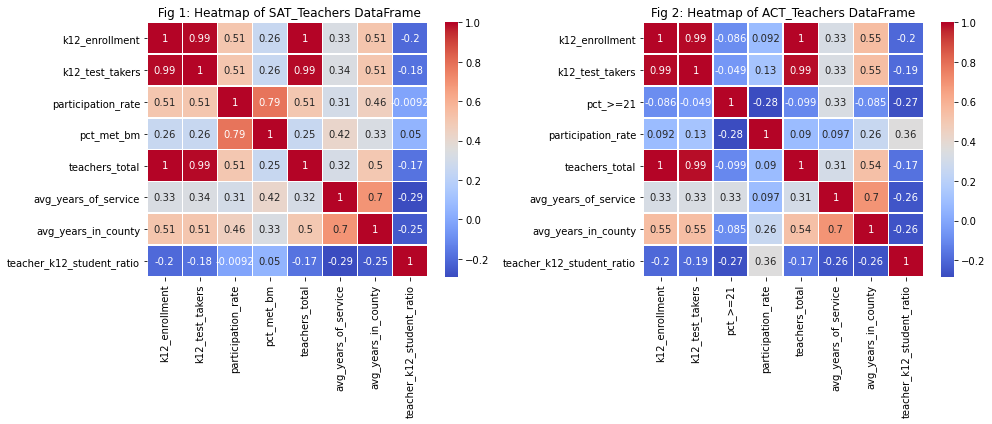

In [36]:
fig,ax = plt.subplots(1,2, figsize=(14,6))
sns.heatmap(sat_teachers.corr(), linewidths=0.5, cmap="coolwarm", ax=ax[0], annot=True)
sns.heatmap(act_teachers.corr(), linewidths=0.5, cmap="coolwarm", ax=ax[1], annot=True)

ax[0].set_title(" Fig 1: Heatmap of SAT_Teachers DataFrame")
ax[1].set_title("Fig 2: Heatmap of ACT_Teachers DataFrame")

plt.tight_layout()

**Interpretation of Scatterplots of sat_teachers and act_teachers**

From the SAT scatterplots in Figs 3-5, we observe that counties that scored above the state mean of % students who met the 2019 SAT benchmark have the following features:

- Teacher-K12 Student Ratio of between 50%-75% (2 lone datapoints near 90% Teacher-K12 Student Ratio are ignored)
- Average Teacher's Years of Service >= 12
- Average Years of Teaching in County >= 10


From the ACT satterplots in Figs 6-8, we observe that counties that scored above the state mean of students who scored 21 marks and above for the 2019 ACT have the following features:

- Teacher-K12 Student Ratio between 58%-73%
- Average Teacher's Years of Service >= 11
- Average Years of Teaching in County >= 8

**SUMMARY**: Comparing Figs 3-5 and Figs 6-8, we observe that in the state of California in 2019, a higher Teacher-K12 Student Ratio, Average Teacher's Years of Service and Years of Teaching in County is required to score above the mean % of students meeting the 2019 SAT benchmark.

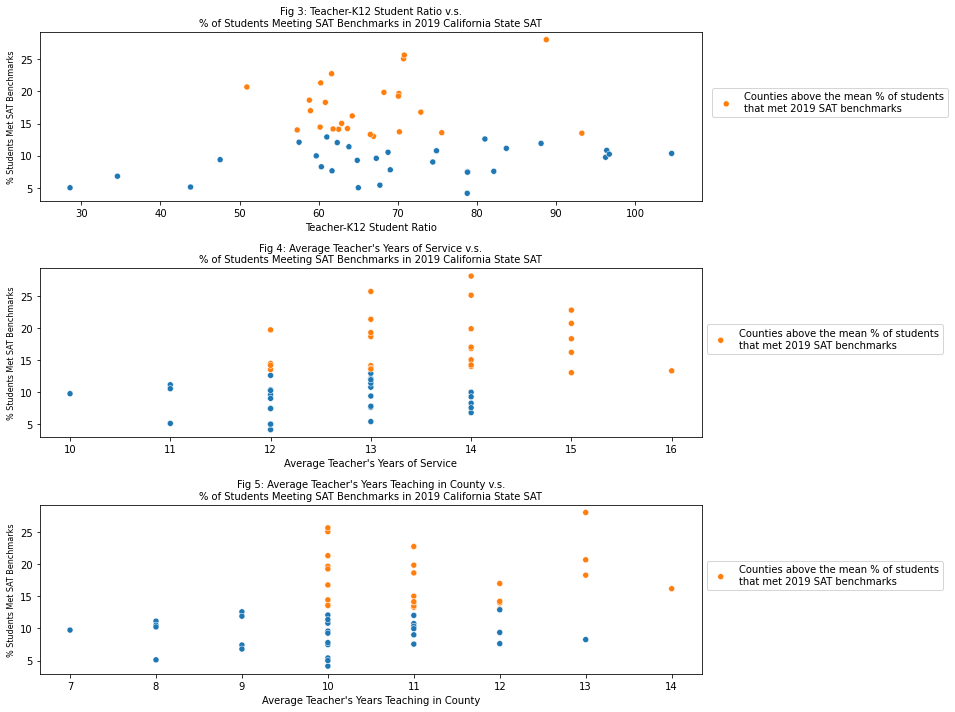

In [37]:
fig, ax = plt.subplots(3,1, figsize=(14,10))
mean_sat_bm = (sat_teachers["pct_met_bm"]) > (sat_teachers["pct_met_bm"].mean())

sns.scatterplot(ax=ax[0], x="teacher_k12_student_ratio", y="pct_met_bm", data=sat_teachers, hue=mean_sat_bm, legend=False)
sns.scatterplot(ax=ax[1], x="avg_years_of_service", y="pct_met_bm", data=sat_teachers, hue=mean_sat_bm, legend=False)
sns.scatterplot(ax=ax[2], x="avg_years_in_county", y="pct_met_bm", data=sat_teachers, hue=mean_sat_bm, legend=False)

ax[0].legend(["Counties above the mean % of students\n"
              "that met 2019 SAT benchmarks"], bbox_to_anchor=[1.38,0.7])
ax[0].set_title("Fig 3: Teacher-K12 Student Ratio v.s.\n" 
                "% of Students Meeting SAT Benchmarks in 2019 California State SAT", fontsize=10)
ax[0].set_xlabel("Teacher-K12 Student Ratio")
ax[0].set_ylabel("% Students Met SAT Benchmarks", fontsize=8)

ax[1].legend(["Counties above the mean % of students\n"
              "that met 2019 SAT benchmarks"], bbox_to_anchor=[1,0.7])
ax[1].set_title("Fig 4: Average Teacher's Years of Service v.s.\n"
                "% of Students Meeting SAT Benchmarks in 2019 California State SAT", fontsize=10)
ax[1].set_xlabel("Average Teacher's Years of Service")
ax[1].set_ylabel("% Students Met SAT Benchmarks", fontsize=8)

ax[2].legend(["Counties above the mean % of students\n"
              "that met 2019 SAT benchmarks"], bbox_to_anchor=[1,0.7])
ax[2].set_title("Fig 5: Average Teacher's Years Teaching in County v.s.\n"
                "% of Students Meeting SAT Benchmarks in 2019 California State SAT", fontsize=10)
ax[2].set_xlabel("Average Teacher's Years Teaching in County")
ax[2].set_ylabel("% Students Met SAT Benchmarks", fontsize=8)

plt.tight_layout()

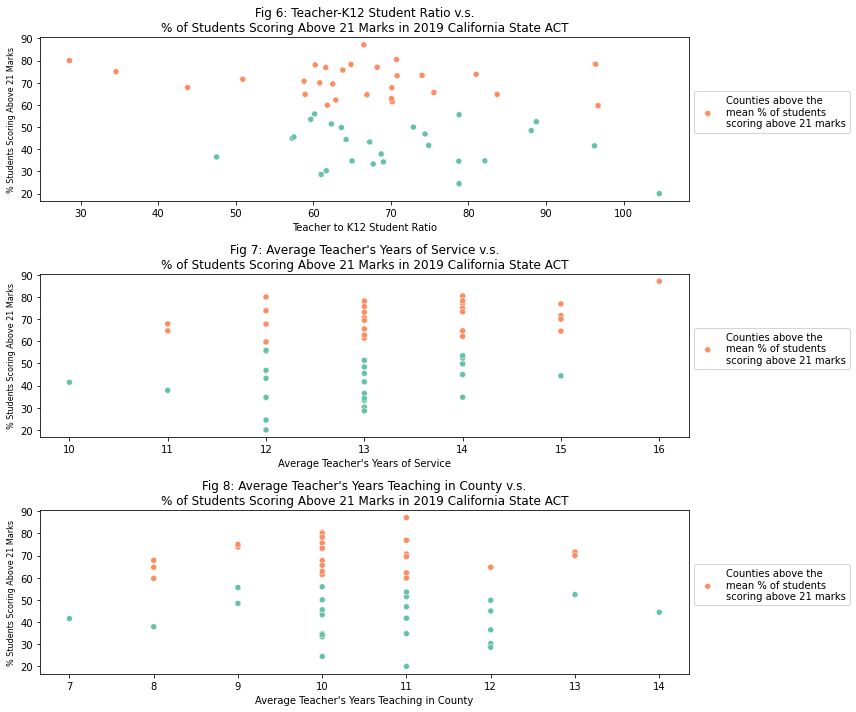

In [38]:
fig, ax = plt.subplots(3,1, figsize=(12,10))
mean_act_21 = (act_teachers["pct_>=21"]) > (act_teachers["pct_>=21"].mean())

sns.scatterplot(ax=ax[0], x="teacher_k12_student_ratio", y="pct_>=21", data=act_teachers, hue=mean_act_21, palette="Set2")
sns.scatterplot(ax=ax[1], x="avg_years_of_service", y="pct_>=21", data=act_teachers, hue=mean_act_21, palette="Set2")
sns.scatterplot(ax=ax[2], x="avg_years_in_county", y="pct_>=21", data=act_teachers, hue=mean_act_21, palette="Set2")

ax[0].legend(["Counties above the\n"
              "mean % of students\n"
              "scoring above 21 marks"], bbox_to_anchor=[1,0.7])
ax[0].set_title("Fig 6: Teacher-K12 Student Ratio v.s.\n"
                "% of Students Scoring Above 21 Marks in 2019 California State ACT")
ax[0].set_xlabel("Teacher to K12 Student Ratio")
ax[0].set_ylabel("% Students Scoring Above 21 Marks", fontsize=8)

ax[1].legend(["Counties above the\n"
              "mean % of students\n"
              "scoring above 21 marks"], bbox_to_anchor=[1,0.7])
ax[1].set_title("Fig 7: Average Teacher's Years of Service v.s.\n"
                "% of Students Scoring Above 21 Marks in 2019 California State ACT")
ax[1].set_xlabel("Average Teacher's Years of Service")
ax[1].set_ylabel("% Students Scoring Above 21 Marks", fontsize=8)

ax[2].legend(["Counties above the\n"
              "mean % of students\n"
              "scoring above 21 marks"], bbox_to_anchor=[1,0.7])
ax[2].set_title("Fig 8: Average Teacher's Years Teaching in County v.s.\n"
                "% of Students Scoring Above 21 Marks in 2019 California State ACT")
ax[2].set_xlabel("Average Teacher's Years Teaching in County")
ax[2].set_ylabel("% Students Scoring Above 21 Marks", fontsize=8)


plt.tight_layout()

**Interpreting Regression Plots of sat_teachers and act_teachers**

Consistent with the observations from the heatmap, the slope of the linear regression line in Figs 9-12 is of the same sign as the correlation coefficients. 

**SUMMARY:** We observe that in general, the Teacher-Student Ratio had negative-to-no relationship in predicting the scores of the measured outcomes for the SAT and ACT. While Average Teacher's Years in Service have a positive relationship in predicting the measured outcome for the SAT and ACT and the Average Teacher's Years in County only has a positive relationship in predicting the measured outcome for the SAT. 

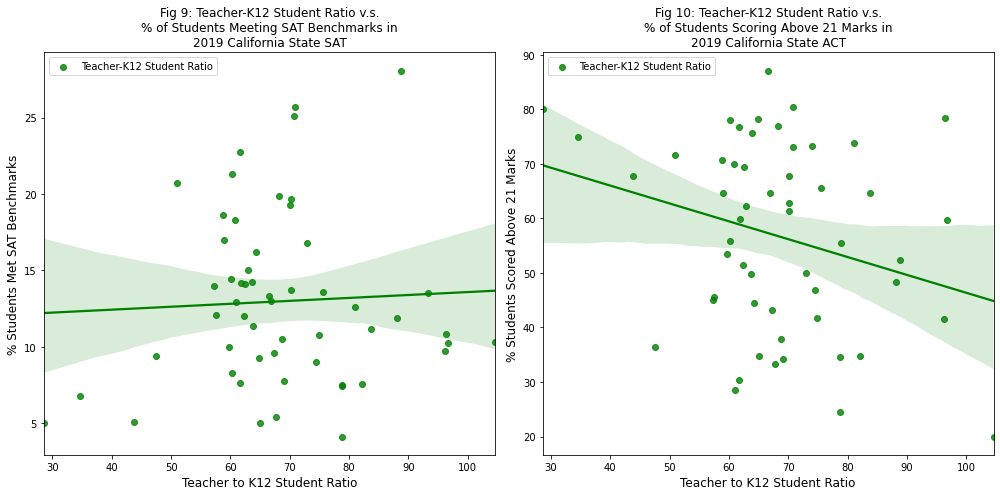

In [39]:
fig,ax = plt.subplots(1,2, figsize = (14, 7))

sns.regplot(ax=ax[0],x="teacher_k12_student_ratio", y="pct_met_bm", data=sat_teachers, color="green", label="Teacher-K12 Student Ratio")
ax[0].set_title("Fig 9: Teacher-K12 Student Ratio v.s.\n"
                "% of Students Meeting SAT Benchmarks in\n"
"2019 California State SAT", fontsize=12)
ax[0].set_xlabel("Teacher to K12 Student Ratio", fontsize=12)
ax[0].set_ylabel("% Students Met SAT Benchmarks", fontsize=12)
ax[0].legend(loc="upper left")

sns.regplot(ax=ax[1],x="teacher_k12_student_ratio", y="pct_>=21", data=act_teachers, color="green", label="Teacher-K12 Student Ratio")
ax[1].set_title("Fig 10: Teacher-K12 Student Ratio v.s.\n"
                "% of Students Scoring Above 21 Marks in\n"
"2019 California State ACT", fontsize=12)
ax[1].set_xlabel("Teacher to K12 Student Ratio", fontsize=12)
ax[1].set_ylabel("% Students Scored Above 21 Marks", fontsize=12)
ax[1].legend(loc="upper left")

plt.tight_layout()

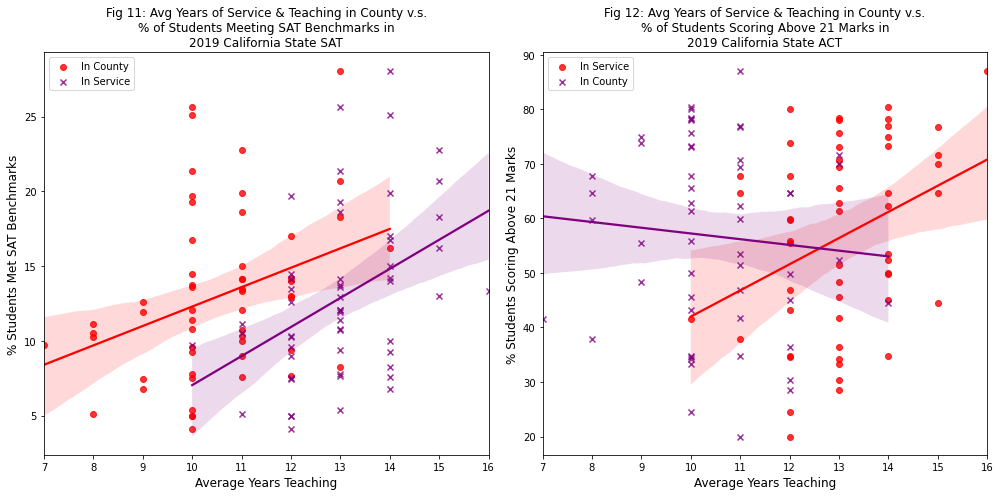

In [40]:
fig,ax = plt.subplots(1,2, figsize = (14, 7))

sns.regplot(ax=ax[0],x="avg_years_in_county", y="pct_met_bm", data=sat_teachers, color="red", label="In County")
sns.regplot(ax=ax[0],x="avg_years_of_service", y="pct_met_bm", data=sat_teachers, color="purple", marker="x", label="In Service")
ax[0].set_title("Fig 11: Avg Years of Service & Teaching in County v.s.\n"
                "% of Students Meeting SAT Benchmarks in\n"
                "2019 California State SAT", fontsize=12)
ax[0].set_xlabel("Average Years Teaching", fontsize=12)
ax[0].set_ylabel("% Students Met SAT Benchmarks", fontsize=12)
ax[0].legend(loc="upper left")

sns.regplot(ax=ax[1],x="avg_years_of_service", y="pct_>=21", data=act_teachers, color="red", label="In Service")
sns.regplot(ax=ax[1],x="avg_years_in_county", y="pct_>=21", data=act_teachers, color="purple",marker="x", label="In County")
ax[1].set_title("Fig 12: Avg Years of Service & Teaching in County v.s.\n" 
                "% of Students Scoring Above 21 Marks in\n"
                "2019 California State ACT", fontsize=12)
ax[1].set_xlabel("Average Years Teaching", fontsize=12)
ax[1].set_ylabel("% Students Scoring Above 21 Marks", fontsize=12)
ax[1].legend(loc="upper left")

plt.tight_layout()

**SUMMARY OF KEY FINDINGS:** 

For the SAT, counties with lower Teacher-Student Ratios do not exhibit better outcomes in terms of greater % of students meeting the 2019 SAT benchmark. Counties with teachers who had greater years of experience in service and in the county itself exhibited better outcomes. Counties that score above the mean of the measured outcome have the following features:

- Teacher-Student Ratio > 50%-75%
- Average Teacher's Years of Service >= 12
- Average Years of Teaching in County >= 10


For the ACT. Counties with a lower Teacher-Student Ratio exhibit better outcomes in terms of a greater % of students scoring >= 21 marks for the 2019 ACT.This may be because the ACT has more subjects and may benefit more from focused attention from teachers. Counties with teachers who had greater years of experience in service also exhibited better outcomes, however, the greater years of teacher experience in the county does not.This may be an outlier observation as we are only taking a 1 year snapshot in 2018-2019. Counties that score above the mean of the measured outcome have the following features:

- Teacher-Student Ratio > 58%-73%
- Average Teacher's Years of Service >= 11
- Average Years of Teaching in County >= 8

## Conclusions and Recommendations

Based on the exploration of the data, this project attempts to answer the question:
> Are better SAT and ACT scores observed in counties with lower Teacher-K
12 Student Ratios and greater teacher experience?

**CONCLUSION AND RECOMMENDATIONS:**  


- There is **insufficient evidence** that lower Teacher-K12 Student Ratios will positively affect SAT and ACT outcomes as no correlation was observed for the SAT while a weak negative correlation was observed for the ACT.

- There is **weak evidence** that teachers with greater experience teaching in the county and in the teaching profession will positively affect the SAT and ACT outcomes as weak positive correlations were observed for the SAT and ACT.

As a member of the California Education Department, my preliminary recommendation would be for the state to hire more experienced teachers (with at least 8 years of experience teaching in the county or 11 years of experience overall) rather than trying to decrease the Teacher-K12 Student Ratio as teaching experience has shown to improve SAT and ACT outcomes compared to Teacher-K12 Student Ratios.

**WAY AHEAD:** More granular data is needed to drill down to the schools in California that require additional support. Access to the data below at the district/school level will be helpful for deeper analysis:

 - Teacher Experience 
 - Number of Teachers Teaching K12 Classes (Numbers used in this study is the total number of teachers teaching at all levels, it would be more accurate to calculate the K12 Teachers-K12 Student Ratio)
 - Raw SAT and ACT Scores at the school level to calculate scores instead of meeting certain benchmarks